## 1. Meet Dr. Ignaz Semmelweis
<p><img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/img/ignaz_semmelweis_1860.jpeg"></p>
<!--
<img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/datasets/ignaz_semmelweis_1860.jpeg">
-->
<p>This is Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 and active at the Vienna General Hospital. If Dr. Semmelweis looks troubled it's probably because he's thinking about <em>childbed fever</em>: A deadly disease affecting women that just have given birth. He is thinking about it because in the early 1840s at the Vienna General Hospital as many as 10% of the women giving birth die from it. He is thinking about it because he knows the cause of childbed fever: It's the contaminated hands of the doctors delivering the babies. And they won't listen to him and <em>wash their hands</em>!</p>
<p>In this notebook, we're going to reanalyze the data that made Semmelweis discover the importance of <em>handwashing</em>. Let's start by looking at the data that made Semmelweis realize that something was wrong with the procedures at Vienna General Hospital.</p>

In [1]:
# importing modules
import pandas as pd
import numpy as np

In [2]:
# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly=pd.read_csv(r"C:\Users\Shailesh Poojary\Documents\Python Programming\yearly_deaths_by_clinic.csv")

In [3]:
# Print out yearly
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


## 2. The alarming number of deaths
<p>The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. You'll notice that giving birth was very dangerous; an <em>alarming</em> number of women died as the result of childbirth, most of them from childbed fever.</p>
<p>We see this more clearly if we look at the <em>proportion of deaths</em> out of the number of women giving birth. Let's zoom in on the proportion of deaths at Clinic 1.</p>

In [4]:
# Calculate proportion of deaths per no. births
yearly["proportion_of_deaths"] = yearly['deaths'] / yearly['births']
yearly.proportion_of_deaths= yearly.proportion_of_deaths*100

yearly

,year,births,deaths,clinic,proportion_of_deaths
0,1841,3036,237,clinic 1,7.806324
1,1842,3287,518,clinic 1,15.759051
2,1843,3060,274,clinic 1,8.954248
3,1844,3157,260,clinic 1,8.235667
4,1845,3492,241,clinic 1,6.901489
5,1846,4010,459,clinic 1,11.446384
6,1841,2442,86,clinic 2,3.521704
7,1842,2659,202,clinic 2,7.596841
8,1843,2739,164,clinic 2,5.987587
9,1844,2956,68,clinic 2,2.300406


In [5]:
# Check the mean proportion of deaths in both the clinics
mean_proportion_deaths = yearly.groupby('clinic')['proportion_of_deaths'].mean()
mean_proportion_deaths

clinic
clinic 1    9.850527
clinic 2    4.039994
Name: proportion_of_deaths, dtype: float64

The above numbers clearly indicate that death proportion is higher in Clinic 1. Check if this is the pattern for each year or is purely random.

If proportion of death is higher for clinic 1, every single year. we can safely assume that there is some issue particularly with Clinic 1 & that it is not a random factor

In [6]:
# Check proportion of death for each year
mean_proportion_of_deaths_yearly = yearly.groupby('year')['proportion_of_deaths'].mean()
mean_proportion_of_deaths_yearly


year
1841     5.664014
1842    11.677946
1843     7.470918
1844     5.268036
1845     4.468949
1846     7.121700
Name: proportion_of_deaths, dtype: float64

In [7]:
# create a column name 'difference' which is clinic 1 death proportion - clinic 2 death proportion 
clinic1_data = yearly[yearly['clinic'] == 'clinic 1'][['year', 'proportion_of_deaths']].rename(columns={'proportion_of_deaths': 'clinic1_proportion'})
clinic2_data = yearly[yearly['clinic'] == 'clinic 2'][['year', 'proportion_of_deaths']].rename(columns={'proportion_of_deaths': 'clinic2_proportion'})

merged_df = pd.merge(clinic1_data, clinic2_data, on='year')
merged_df['difference'] = merged_df['clinic1_proportion'] - merged_df['clinic2_proportion']

merged_df

,year,clinic1_proportion,clinic2_proportion,difference
0,1841,7.806324,3.521704,4.284621
1,1842,15.759051,7.596841,8.162210
2,1843,8.954248,5.987587,2.966662
3,1844,8.235667,2.300406,5.935261
4,1845,6.901489,2.036409,4.865081
5,1846,11.446384,2.797017,8.649368


In [8]:
# print the 5 point summary for 'difference'
merged_df['difference'].describe()

count    6.000000
mean     5.810534
std      2.232255
min      2.966662
25%      4.429736
50%      5.400171
75%      7.605473
max      8.649368
Name: difference, dtype: float64

We have clear evidence now that there is something fishy with Clinic 1's method of treatment. As clearly the death proportion is higher every single year.

## 3. The handwashing begins
<p>Why is the proportion of deaths constantly so much higher in Clinic 1? Semmelweis saw the same pattern and was puzzled and distressed. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses. </p>
<p>Semmelweis started to suspect that something on the corpses, spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: <em>Wash your hands!</em> This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time. </p>
<p>Let's load in monthly data from Clinic 1 to see if the handwashing had any effect.</p>

The Clinic 1 monthly file is a sub-divided based on years. Let us first prepare a structured dataset for our analysis 

In [9]:
# Read dataset/monthly_deaths using excelfile
monthly=pd.read_excel(r"C:\Users\Shailesh Poojary\Documents\Python Programming\monthly_deaths.xlsx")

In [10]:
# print all sheet names
sheet_names = pd.ExcelFile(r"C:\Users\Shailesh Poojary\Documents\Python Programming\monthly_deaths.xlsx").sheet_names
for i in sheet_names:
    print(i)

c1_41
c1_42
c1_43
c1_44
c1_45
c1_46
c1_47
c1_48
c1_49


Import all files 
* either using a for loop & save it in a dictionary (OR) 
* import each file one after the other

In [1]:
hdata = {}
for i in sheet_names:
    hdata[i] = pd.ExcelFile(r"C:\Users\Shailesh Poojary\Documents\Python Programming\monthly_deaths.xlsx").parse(i)
print(hdata)

NameError: name 'sheet_names' is not defined

Inspect column names & data types for each dataset using a for loop

In [15]:
# using for loop inspect column names & data type for each dataset
for i, j in hdata.items():
    print(i)
    print("--"*3)
    print(j.dtypes)
    print('--'*35)
    print('--'*35)
    

c1_41
------
date      object
births     int64
deaths    object
dtype: object
----------------------------------------------------------------------
----------------------------------------------------------------------
c1_42
------
date      object
births     int64
deaths     int64
dtype: object
----------------------------------------------------------------------
----------------------------------------------------------------------
c1_43
------
date      object
births     int64
deaths     int64
dtype: object
----------------------------------------------------------------------
----------------------------------------------------------------------
c1_44
------
date      object
births     int64
deaths     int64
dtype: object
----------------------------------------------------------------------
----------------------------------------------------------------------
c1_45
------
date      object
births     int64
deaths     int64
dtype: object
------------------------------------------

Pay special attention to c1_41 & c1_47 

In [16]:
# rename column for c1_47
if 'c1_47' in hdata:
    hdata['c1_47'] = hdata['c1_47'].rename(columns={'death': 'deaths'})
else:
    print("Sheet 'c_47' not found in the dictionary.")
print(hdata['c1_47'])

          date  births  deaths
0   1847-01-01     311      10
1   1847-02-01     312       6
2   1847-03-01     305      11
3   1847-04-01     312      57
4   1847-05-01     294      36
5   1847-06-01     268       6
6   1847-07-01     250       3
7   1847-08-01     264       5
8   1847-09-01     262      12
9   1847-10-01     278      11
10  1847-11-01     246      11
11  1847-12-01     273       8


In [17]:
# change text 'fifty' to numeric 50
if 'c1_41' in hdata:
    hdata['c1_41']['deaths'] = hdata['c1_41']['deaths'].replace('fifty', '50')
else:
    print("Sheet 'c_41' not found in the dictionary.")
print(hdata['c1_41'])

          date  births deaths
0   1841-01-01     254     37
1   1841-02-01     239     18
2   1841-03-01     277     12
3   1841-04-01     255      4
4   1841-05-01     255      2
5   1841-06-01     200     10
6   1841-07-01     190     16
7   1841-08-01     222      3
8   1841-09-01     213      4
9   1841-10-01     236     26
10  1841-11-01     235     53
11  1841-12-01     225     50


In [18]:
# convert deaths from object to numeric
if 'c1_41' in hdata:
    hdata['c1_41']['deaths'] = pd.to_numeric(hdata['c1_41']['deaths'])
else:
    print("Sheet 'c1_41' not found in the dictionary.")


In [19]:
# check dtype for c1_41 again & confirm if it is in suitable format
if 'c1_41' in hdata:
    print(hdata['c1_41']['deaths'].dtype)
else:
    print("Sheet 'c1_41' not found in the dictionary.")

int64


Now that we have made all the datasets in the same format. Let us append all of them.

In [20]:
# append using loop, concat or append function
comb_data = pd.concat(hdata.values(), ignore_index=True)

In [21]:
# print head & tail of the final data set
print((comb_data).head())
print('-----------------------------------')
print((comb_data).tail())

         date  births  deaths
0  1841-01-01     254      37
1  1841-02-01     239      18
2  1841-03-01     277      12
3  1841-04-01     255       4
4  1841-05-01     255       2
-----------------------------------
          date  births  deaths
94  1848-11-01     310       9
95  1848-12-01     373       5
96  1849-01-01     403       9
97  1849-02-01     389      12
98  1849-03-01     406      20


Now that we have prepared the data

## 4. The effect of handwashing
<p>With the data loaded we can now look at the proportion of deaths over time. In the plot below we haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that you should be able to spot it!</p>

In [22]:
# Create the death proportion column, which is 'death'/'births'
comb_data['death_proportion'] = (comb_data['deaths'] / comb_data['births'])*100
comb_data.head()

,date,births,deaths,death_proportion
0,1841-01-01,254,37,14.566929
1,1841-02-01,239,18,7.531381
2,1841-03-01,277,12,4.332130
3,1841-04-01,255,4,1.568627
4,1841-05-01,255,2,0.784314


In [23]:
# create a year column but before that, convert object to datetime
comb_data['date'] = pd.to_datetime(comb_data['date'])
comb_data.dtypes

date                datetime64[ns]
births                       int64
deaths                       int64
death_proportion           float64
dtype: object

In [24]:
# create a year column
comb_data['year'] = comb_data['date'].dt.year
comb_data.sample(5)

,date,births,deaths,death_proportion,year
81,1847-10-01,278,11,3.956835,1847
58,1845-11-01,265,29,10.943396,1845
17,1842-06-01,273,18,6.593407,1842
76,1847-05-01,294,36,12.244898,1847
23,1842-12-01,239,75,31.380753,1842


In [25]:
# Check year wise proportion of death & confirm if it reduced drastically after a particular year
pd.pivot_table(comb_data,index='year',values='death_proportion',aggfunc='mean')

,death_proportion
year,
1841,8.435507
1842,17.680815
1843,8.894698
1844,8.833565
1845,7.423397
1846,13.843926
1847,5.044240
1848,1.240796
1849,3.414731


It appears that mostly from 1847 onwards, the death proportion reduced. Let us deep dive in the year 1847 & track it at monthly level

In [26]:
# Check monthly proportion of death for the year 1847
comb_data[comb_data['year'] == 1847].pivot_table(index=comb_data[comb_data['year'] == 1847]['date'].dt.month.rename('months_of_1847'), values='death_proportion', aggfunc='mean') 

,death_proportion
months_of_1847,
1,3.215434
2,1.923077
3,3.606557
4,18.269231
5,12.244898
6,2.238806
7,1.200000
8,1.893939
9,4.580153


## 5. The effect of handwashing highlighted
<p>Starting from the summer of 1847 the proportion of deaths is drastically reduced and, yes, this was when Semmelweis made handwashing obligatory. </p>
<p>The effect of handwashing is made even more clear if we highlight this in the graph.</p>

In [27]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

In [28]:
# Split dataframe into before and after handwashing_start (which we have created in the above cell)
before_washing = comb_data[comb_data['date'] < handwashing_start]
after_washing = comb_data[comb_data['date'] >= handwashing_start]

<p> Visual proof of how effective, handwashing excercise was. <p>
 
The below code will run only if : 
* datasets name are 'before_washing' & 'after_washing'
* there is a column named 'date' in datetime 
* the column name for proportion of death is 'death_proportion'

Text(0, 0.5, 'Proportion deaths')

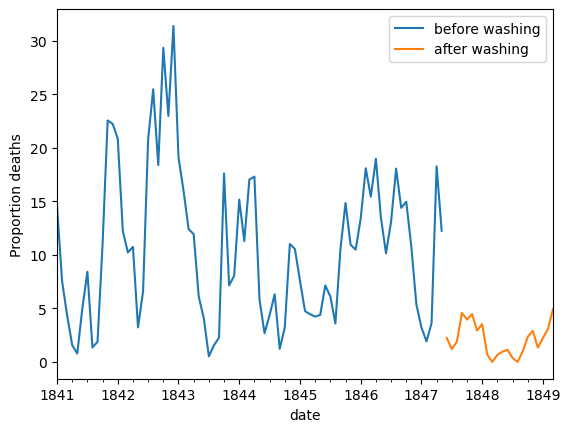

In [29]:
# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x='date', y='death_proportion', label = 'before washing')
after_washing.plot(x='date', y='death_proportion', label = 'after washing', ax= ax)
ax.set_ylabel('Proportion deaths')

## 6. More handwashing, fewer deaths?
<p>Again, the graph shows that handwashing had a huge effect. How much did it reduce the monthly proportion of deaths on average?</p>

In [30]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['death_proportion']
after_proportion = after_washing['death_proportion']
mean_diff =  before_proportion.mean() - after_proportion.mean()
mean_diff

8.547832490940653

## 7. The fate of Dr. Semmelweis
<p>So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.</p>
<p>The tragedy is that, despite the evidence, Semmelweis' theory — that childbed fever was caused by some "substance" (what we today know as <em>bacteria</em>) from autopsy room corpses — was ridiculed by contemporary scientists. The medical community largely rejected his discovery and in 1849 he was forced to leave the Vienna General Hospital for good.</p>
<p>One reason for this was that statistics and statistical arguments were uncommon in medical science in the 1800s. Semmelweis only published his data as long tables of raw data, but he didn't show any graphs nor confidence intervals. If he would have had access to the analysis we've just put together he might have been more successful in getting the Viennese doctors to wash their hands.</p>

# THE END